In [105]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import bokeh

from bokeh.plotting import figure, show, output_file

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

from src import definitions
from IPython.display import display
from src.utils import read_utils as reader
from src.utils import student_utils
from src.utils import data_conversion_utils as conversions
from src.bin import plotting

from importlib import reload

reload(plotting)

<module 'src.bin.plotting' from '/media/abhinav/Projects/MultiRes/student_life/src/bin/plotting.py'>

In [106]:
students = student_utils.get_available_students(definitions.BINNED_ON_VAR_FREQ_DATA_PATH)
students = [53]
data = student_utils.get_var_binned_data_for_students(*students)
students_data = data[0]
actual_data = data[0]
print(actual_data.columns)

Index(['student_id', 'day_of_week', 'epoch_of_day', 'time_since_last_label',
       'time_to_next_label', 'previous_stress_label', 'time_to_next_deadline',
       'activity_inference_mode', 'activity_inference_inferred_feature',
       'audio_activity_inference_mode',
       'audio_activity_inference_inferred_feature', 'sms_instance_count',
       'conv_duration_min_inferred_mode',
       'phonecharge_duration_min_inferred_mode',
       'phonelock_duration_min_inferred_mode',
       'dark_duration_min_inferred_mode', 'hours_slept_robust_sum',
       'sleep_rating_robust_sum', 'latitude_mode', 'longitude_mode',
       'stress_level_mode'],
      dtype='object')


In [119]:
bokeh_data = actual_data
bokeh_data = conversions.normalize(actual_data, norm_type='min_max')

line_color=['#FF0000', '#4682B4']
line_alpha = [1, 0.5]
line_width = [1, 1]

x_axis_list = [bokeh_data.index, bokeh_data.index]
y_axis_data = [bokeh_data.previous_stress_label, 
               bokeh_data.time_to_next_deadline]
plotting.plot_line_chart_using_bokeh(x_axis_list, y_axis_data, line_color, 
                                    'stress_vs_dead_lines', "data_visualization/stress_vs_dead_lines.html", 
                                    show_fig=True,
                                    line_width=line_width,
                                    line_alpha=line_alpha)

In [121]:
bokeh_data = actual_data.loc['2013-03-29': '2013-04-09', :]
bokeh_data = conversions.normalize(bokeh_data, norm_type='min_max')
line_width = [1, 0.2]

x_axis_list = [bokeh_data.index, bokeh_data.index]
y_axis_data = [bokeh_data.previous_stress_label, 
               bokeh_data.conv_duration_min_inferred_mode]
plotting.plot_line_chart_using_bokeh(x_axis_list, y_axis_data, line_color, 
                                     'stress_vs_conv', "data_visualization/stress_vs_conv.html", 
                                     show_fig=True,
                                     plot_width=1400,
                                     line_width=line_width,
                                     line_alpha=line_alpha)

x_axis_list = [bokeh_data.index, bokeh_data.index]
y_axis_data = [bokeh_data.previous_stress_label, 
               bokeh_data.activity_inference_inferred_feature]
plotting.plot_line_chart_using_bokeh(x_axis_list, y_axis_data, line_color, 
                                    'stress_vs_activity', "data_visualization/stress_vs_activity.html", 
                                    show_fig=True,
                                    plot_width=1400,
                                    line_width=line_width,
                                    line_alpha=line_alpha)

x_axis_list = [bokeh_data.index, bokeh_data.index]
y_axis_data = [bokeh_data.previous_stress_label, 
               bokeh_data.audio_activity_inference_mode]
plotting.plot_line_chart_using_bokeh(x_axis_list, y_axis_data, line_color, 
                                    'stress_vs_audio', "data_visualization/stress_vs_audio.html", 
                                    show_fig=True,
                                    plot_width=1400,
                                    line_width=line_width,
                                    line_alpha=line_alpha)


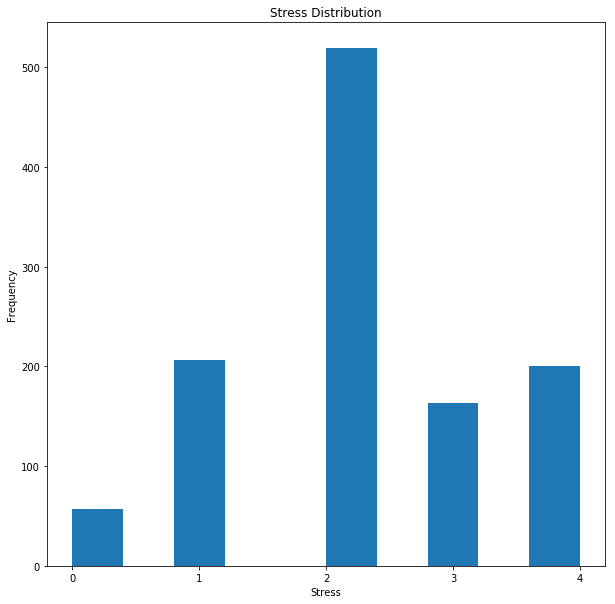

In [3]:
ax = students_data['stress_level_mode'].plot(figsize=(10, 10), 
                                        kind="hist", 
                                        bins=10, 
                                        alpha=1, 
                                        stacked=False, 
                                        xticks=[0 ,1, 2, 3, 4])
plt.title("Stress Distribution")
plt.xlabel('Stress')
plt.savefig("data_visualization/stress_labels_distribution.png", format='png')



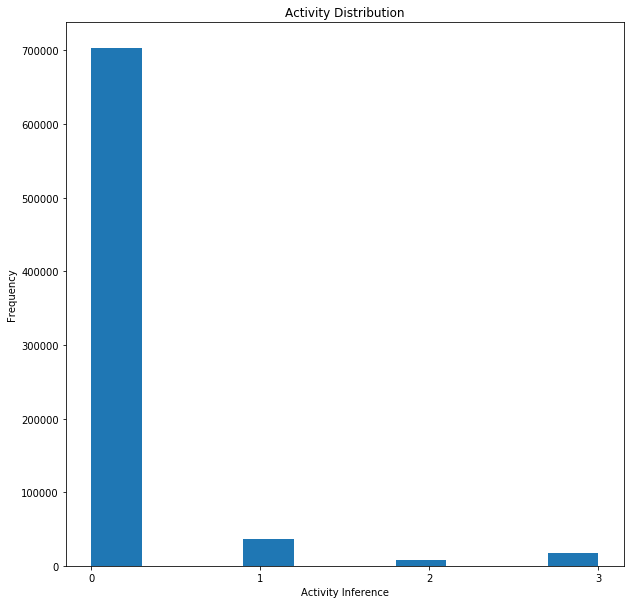

In [4]:
students_data['activity_inference_mode'].plot(figsize=(10, 10), 
                                        kind="hist", 
                                        bins=10, 
                                        alpha=1, 
                                        stacked=False, 
                                        xticks=[0 , 1, 2 ,3])
plt.title("Activity Distribution")
plt.xlabel("Activity Inference")
plt.savefig("data_visualization/activity_inference_distribution.png", format='png')



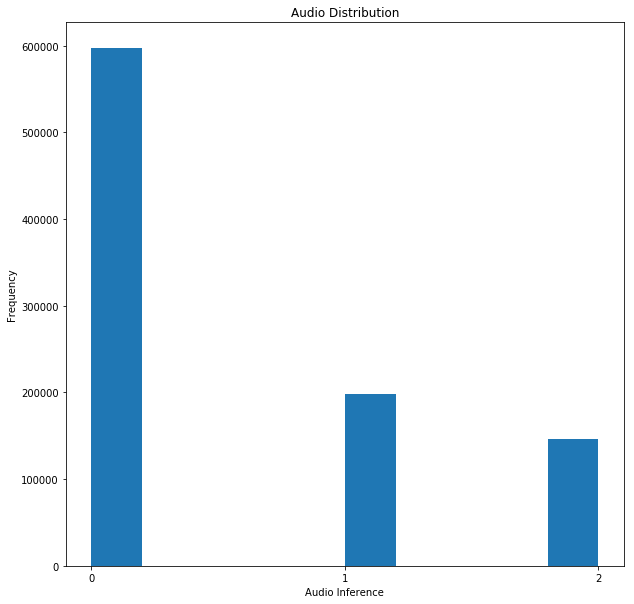

In [5]:
students_data['audio_activity_inference_mode'].plot(figsize=(10, 10), 
                                        kind="hist", 
                                        bins=10, 
                                        alpha=1, 
                                        stacked=False, 
                                        xticks=[0 ,1 ,2])
plt.title("Audio Distribution")
plt.xlabel("Audio Inference")
plt.savefig("data_visualization/audio_inference_distribution.png", format='png')

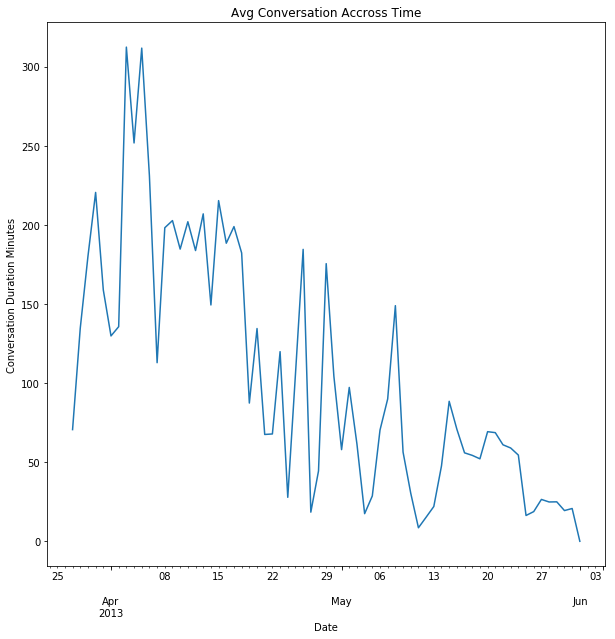

In [6]:
student_count = len(students_data['student_id'].unique())

def sum_avg(array_like):
    return np.sum(array_like) / student_count
    
conv_data = students_data['conv_duration_min_sum']
conv_data = conv_data.resample(rule="1D").agg(sum_avg)
conv_data.plot(figsize=(10, 10), kind="line", alpha=1, stacked=False, use_index=True)
plt.title("Avg Conversation Accross Time")
plt.xlabel("Date")
plt.ylabel("Conversation Duration Minutes")
plt.savefig("data_visualization/conversation_duration.png", format='png')

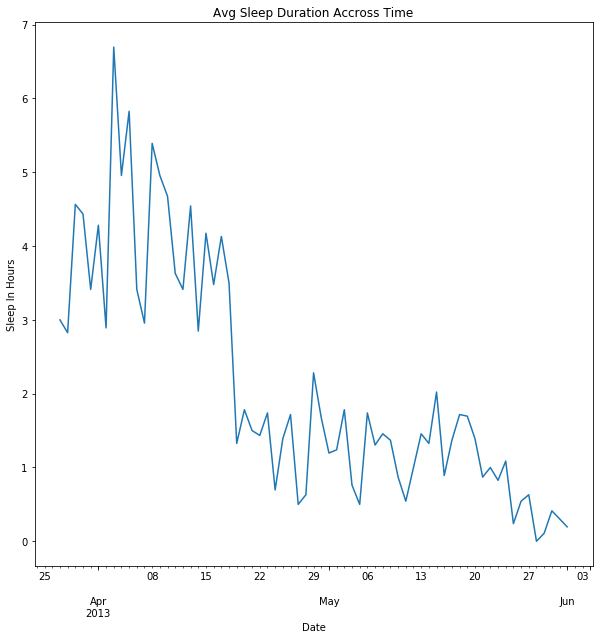

In [7]:
conv_data = students_data['hours_slept_sum']
conv_data = conv_data.resample(rule="1D").agg(sum_avg)
conv_data.plot(figsize=(10, 10), kind="line", alpha=1, stacked=False, use_index=True)
plt.title("Avg Sleep Duration Accross Time")
plt.xlabel("Date")
plt.ylabel("Sleep In Hours")
plt.savefig("data_visualization/sleep_duration.png", format='png')